 Como projeto de aprendizagem foi escolhido a base de dados referente a transparência passiva da [Escala Brasil Transparente.](https://www.gov.br/cgu/pt-br/acesso-a-informacao/dados-abertos/arquivos/ebt). 

O objetivo é demonstrar alguns conhecimentos de tratamento de dados.
Para inicar o projeto foi utilizado as seguintes bibliotecas.
```
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
```
 




In [304]:
import pandas as pd
import matplotlib as plt
# import matplotlib.pyplot as plt

x = '/content/drive/MyDrive/Datasets/EBT.csv'
df = pd.read_csv(x, encoding= 'unicode_escape', error_bad_lines=False,sep=';')

In [305]:
""" TRATAMENTO INICIAIS DOS DADOS """
df = df.rename(columns={'uf':'estado'}) # Renomeando coluna estado
df.dropna(how='all', inplace=True) # Remove linhas com valores faltantes
df['dt_inicio_avaliacao'] = pd.to_datetime(df['dt_inicio_avaliacao'])
df['dt_fim_avaliacao'] = pd.to_datetime(df['dt_fim_avaliacao'])

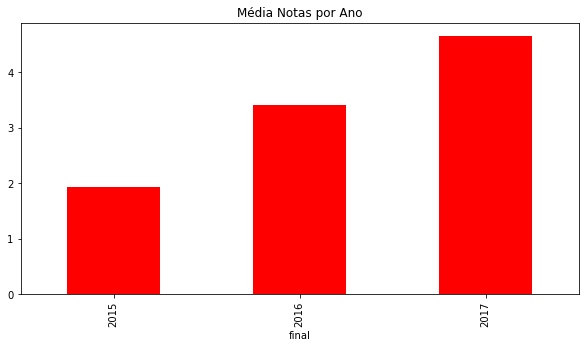

In [306]:
df = df.rename(columns={'dt_fim_avaliacao':'final'})
df.groupby(df['final'].dt.year)['nota'].mean().plot.bar(title  = 'Média Notas por Ano', color ='red', figsize=(10,5)); 

APÓS A AVALIAÇÃO INICIAL DAS NOTAS, RESOLVI FOCAR NO SUDESTE PARA FAZER A ANÁLISE DOS DADOS, COM ENFASE NA SUA PONTUAÇÃO

In [307]:
# SELECIONA OS ESTADOS DO SUDESTES
sudeste = df.loc[df['estado'].isin(['SP', 'ES', 'RJ', 'MG'])]
pizza = sudeste.groupby(sudeste['estado'])['total_pontos'].sum()

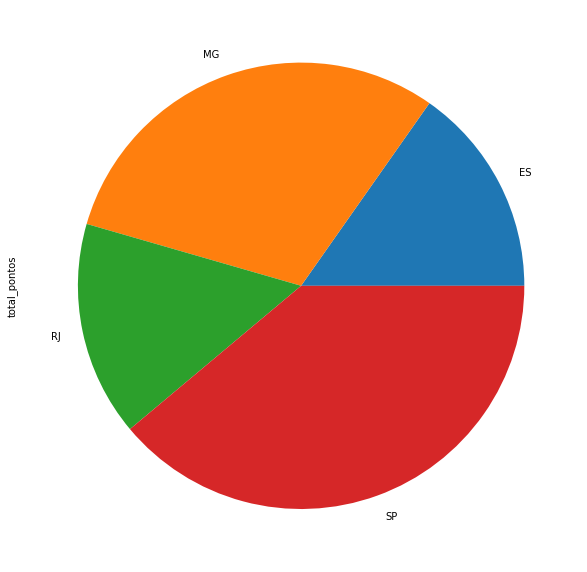

In [257]:
# GRAFICO PIZZA
pizza.plot.pie(subplots = True, figsize=(10,20));

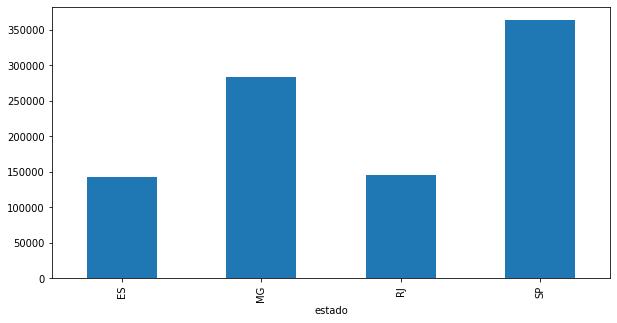

In [258]:
# GRAFICO BARRA
pizza.plot.bar(figsize=(10,5));

O ESPÍRITO SANTO FOI O ESTADO DO SUDESTE QUE APRESENTOU A MENOR PONTUAÇÃO, PORTANTO, O FOCO DO PROJETO SERÁ NELE.

In [262]:
es_dados = df.loc[df['estado'] == 'ES']

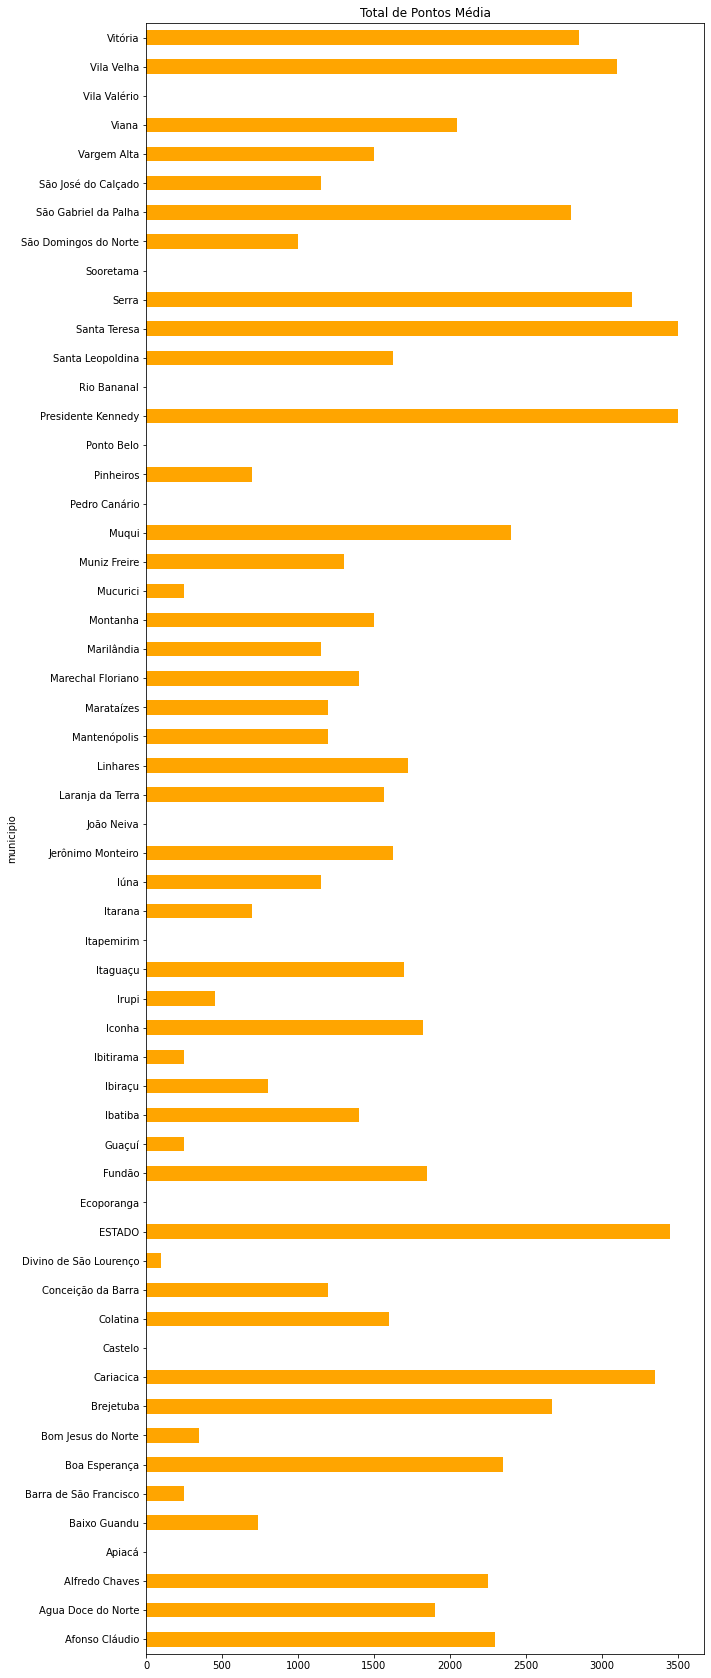

In [263]:
# MEDIA DE PONTOS TOTAIS DOS MUNICIPIOS e do "ESTADO" DURANTE OS ANOS

df.groupby(es_dados['municipio'])['total_pontos'].mean().plot.barh(title  = 'Total de Pontos Média', color ='orange', figsize=(10,30));

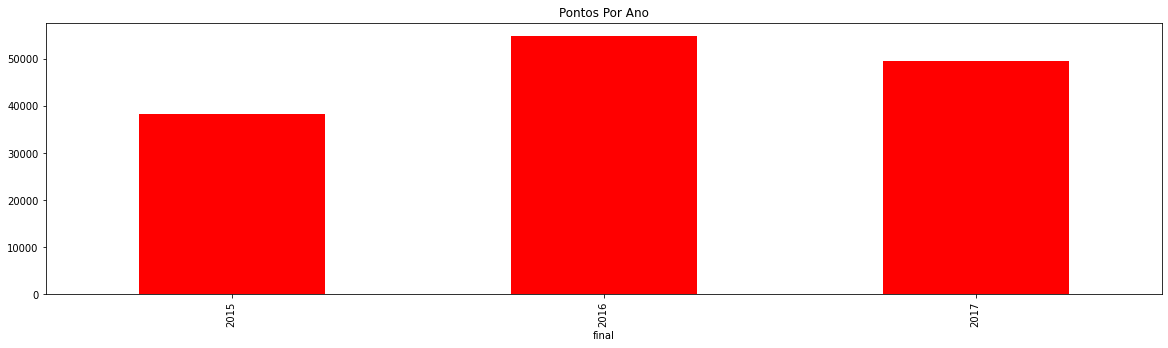

In [244]:
# PONTOS POR ANOS
es_dados.groupby(es_dados['final'].dt.year)['total_pontos'].sum().plot.bar(title  = 'Pontos Por Ano', color ='red', figsize=(20,5)); 

In [298]:
# SEPARA OS DADOS POR ANO
es_dados_2015 = es_dados[es_dados['final'].dt.year == 2015]
es_dados_2016 = es_dados[es_dados['final'].dt.year == 2016]
es_dados_2017 = es_dados[es_dados['final'].dt.year == 2017]
es_dados_2015.to_csv('dados_2015.csv', index = False)


In [302]:
final = es_dados_2015.groupby(es_dados_2015['municipio'])['nota_1'].sum()
final.sample(10)

municipio
Iconha                 1.94
São José do Calçado    0.00
Linhares               1.25
Itapemirim             0.00
Ecoporanga             0.00
Fundão                 2.50
Mucurici               0.00
Vargem Alta            3.33
Itarana                0.00
Jerônimo Monteiro      4.72
Name: nota_1, dtype: float64

CONCLUSÕES: ANALISANDO OS DADOS OBSERVA-SE QUE AS NOTAS BAIXAS PODEM SER REFLEXO NA AUSÊNCIA DE IMPLANTAÇÃO DE UM PROJETO PARA AVALIAÇÃO DA TRANSPARÊNCIA PASSIVA.